In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


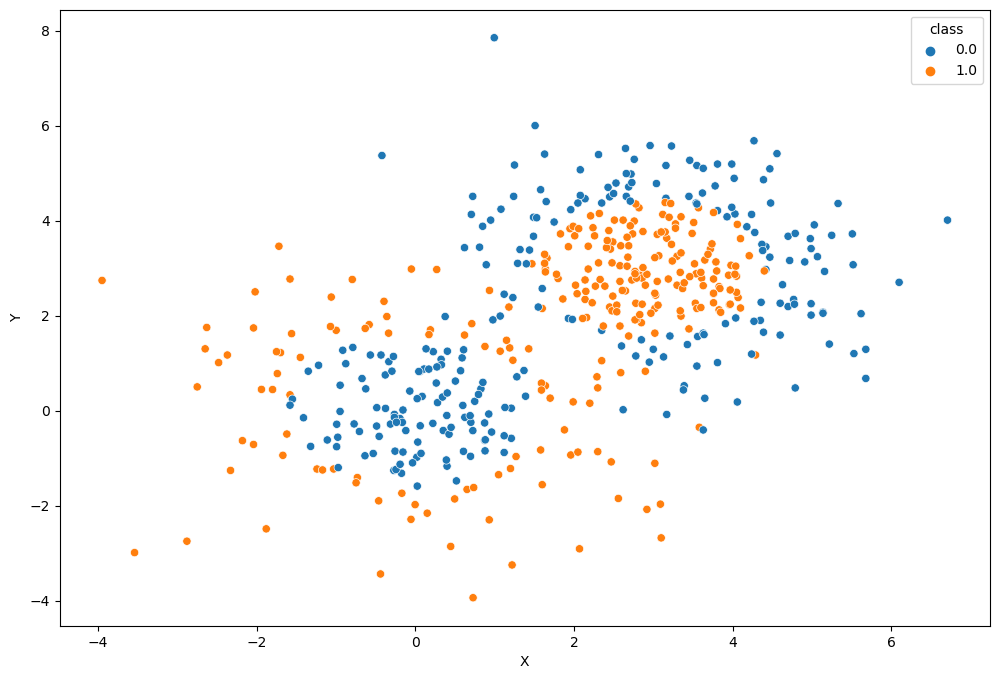

In [5]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
### Your code is here

X = circ.drop(['class'], axis=1)
y = circ['class']

logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [10]:
logreg.predict(X)
accuracy_score(y, logreg.predict(X))

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [11]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
ans = {}

for k in all_k:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    ans[k] = accuracy_score(y_test, predict)

In [15]:
ans

{1: 0.89, 3: 0.87, 10: 0.85, 30: 0.74, 40: 0.75, 60: 0.73}

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [16]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [21]:
### Your code is here

all_k = [1, 5, 10]

### Your code is here
ans_not_ort = {}

for k in all_k:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    ans_not_ort[k] = accuracy_score(y_test, predict)

ans_not_ort

{1: 0.43819542019519236, 5: 0.44317016671097104, 10: 0.4703603843086621}

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ans_ort = {}

for k in all_k:

    model = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors = k))])
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    ans_ort[k] = accuracy_score(y_test, predict)

ans_ort

{1: 0.5648805681084571, 5: 0.6303877264269168, 10: 0.6607678578209851}

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [24]:
### Your code is here

model = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors = k, p=1))])
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [25]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


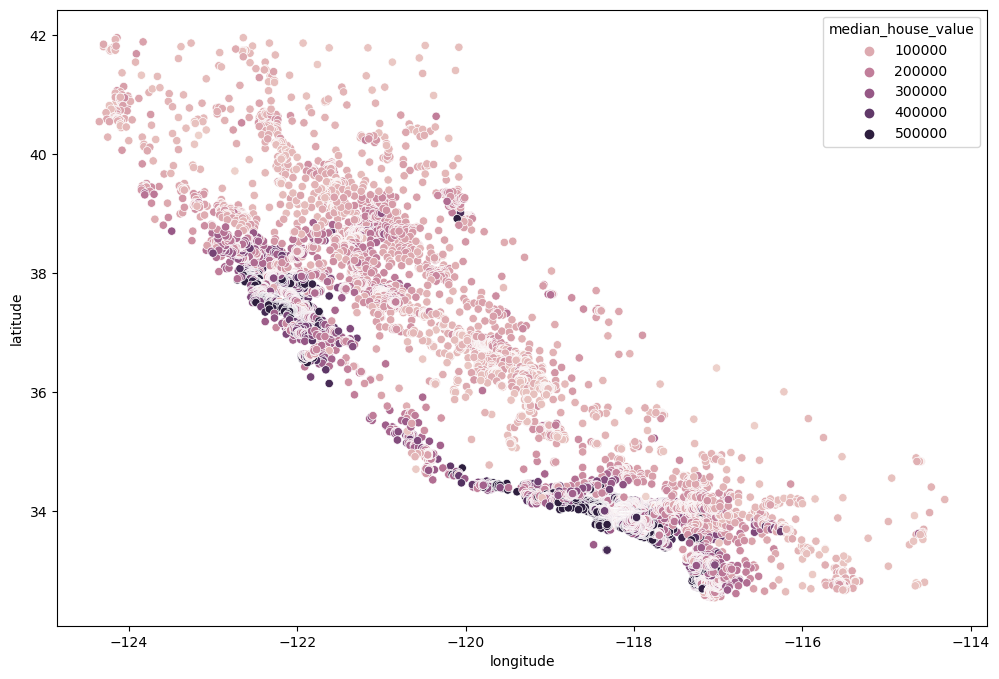

In [29]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y);

In [28]:
### Your code is here

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ans = {}

all_k = np.arange(0.02, 0.1, 0.01)

for k in range(1,10):

    model = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors = k))])
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    ans[k] = accuracy_score(y_test, predict)

ans

{1: 0.02567829457364341,
 2: 0.019622093023255814,
 3: 0.023013565891472867,
 4: 0.025436046511627907,
 5: 0.029796511627906978,
 6: 0.03125,
 7: 0.03294573643410853,
 8: 0.034156976744186045,
 9: 0.034156976744186045}

In [46]:
from sklearn.metrics import mean_squared_error as mse

all_p = np.arange(0.02, 0.1, 0.01)
ans = {}

for p in all_p:

    def kernel(distances, h=p):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2

        return const * np.exp(power)



    model = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors = 9, weights = kernel))])



    model.fit(X_train, y_train)

    predict = model.predict(X_test)

    ans[p] = mse(y_test, predict)

In [47]:
ans

{0.02: 4542658695.158188,
 0.03: 4603321127.765504,
 0.039999999999999994: 4604010827.377907,
 0.049999999999999996: 4604445904.897286,
 0.06: 4605824233.385659,
 0.06999999999999999: 4607554010.66279,
 0.07999999999999999: 4607044795.401163,
 0.09: 4610371772.290698}

In [44]:
list(ans.keys())

[0.02,
 0.03,
 0.039999999999999994,
 0.049999999999999996,
 0.06,
 0.06999999999999999,
 0.07999999999999999,
 0.09]

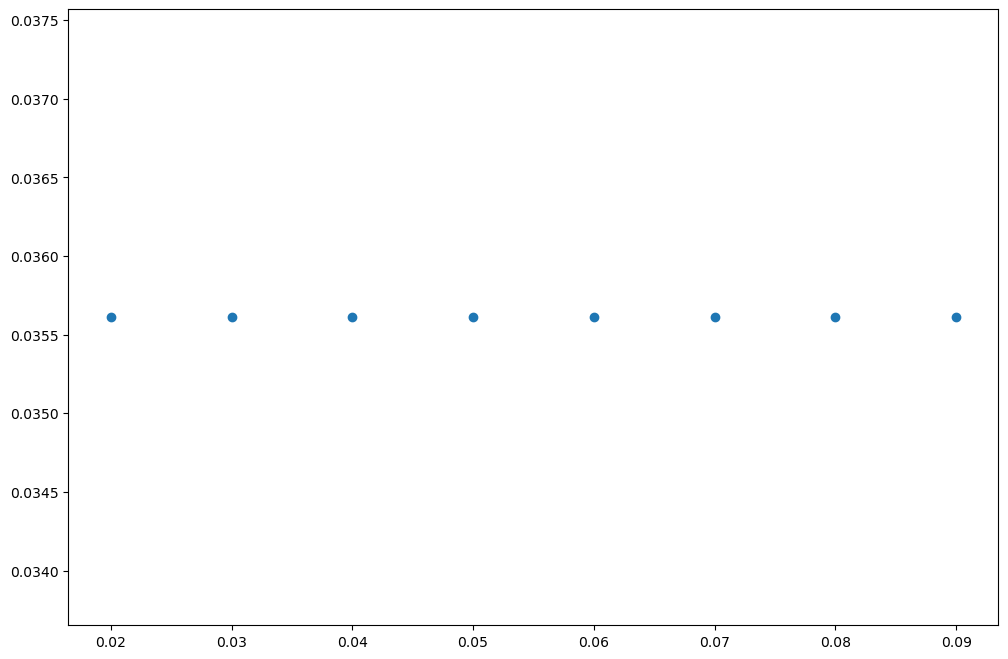

In [45]:
plt.scatter(x=list(ans.keys()), y=list(ans.values()))